In [10]:
api_token = {"username":"tomasmendezba",
             "key":"7a267eee23cd7a04ff6723afc1021034"}

In [11]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token, file)

In [13]:
!chmod 600 /root/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

diabetes-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile

archivo_zip = '/content/drive/MyDrive/Descargas_kaggle/diabetes-health-indicators-dataset.zip'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)

diabetes_012_health_indicators_BRFSS2015.csv
diabetes_binary_5050split_health_indicators_BRFSS2015.csv
diabetes_binary_health_indicators_BRFSS2015.csv


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Dataset_complementario_diabetes = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  with zip_file.open(Dataset_complementario_diabetes) as Diabetes_csv:
    dataframe_diabetes_csv = pd.read_csv(Diabetes_csv)

Con este dataframe complementario tendremos balanceadas las clases y la variable target "Diabetes_012" se transforma a "Diabetes_binary" que tiene el valor de "0" para no diabetes y "1" para diabetes y prediabetes.

In [21]:
dataframe_diabetes_csv.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [22]:
dataframe_diabetes_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [23]:
dataframe_diabetes_csv.describe()

Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000      0.000000      0.000000              0.000000   
50%       29.000000      0.000000      0.000000              0.000000   
75%       33.000000      1.000000      0.000000              0.000000   
max       98.000000      1.000000      1.000000              1.000000   

       PhysActivity        Fruits  ...  AnyHealthcare   NoDocbcCost  \
count  70692.000000  70692.000000  ...   70692.000000  70692.000000   
mean       0.703036      0.611795  ...       0.954960      0.093914   
std        0.456924      0.487345  ...       0.207394      0.291712   
min        0.000000      0.000000  ...       0.000000      0.000000   
25%        0.000000      0.000000  ...       1.000000      0.000000   
50%        1.000000      1.000000  ...       1.000000      0.000000   
75%        1.000000      1.000000  ...       1.000000      0.000000   
max        1.000000      1.000000  ...       1.000000      1.000000   

            GenHlth      MentHlth      PhysHlth      DiffWalk           Sex  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       2.837082      3.752037      5.810417      0.252730      0.456997   
std        1.113565      8.155627     10.062261      0.434581      0.498151   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.000000      0.000000      0.000000      0.000000      0.000000   
75%        4.000000      2.000000      6.000000      1.000000      1.000000   
max        5.000000     30.000000     30.000000      1.000000      1.000000   

                Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  
mean       8.584055      4.920953      5.698311  
std        2.852153      1.029081      2.175196  
min        1.000000      1.000000      1.000000  
25%        7.000000      4.000000      4.000000  
50%        9.000000      5.000000      6.000000  
75%       11.000000      6.000000      8.000000  
max       13.000000      6.000000      8.000000  

[8 rows x 22 columns]

A través del siguiente gráfico podemos verificar que nuestra variable target está completamente equilibrada. Asimismo, se puede observar que se ha unificado la cantidad de casos de prediabetes y diabetes en una variable única.

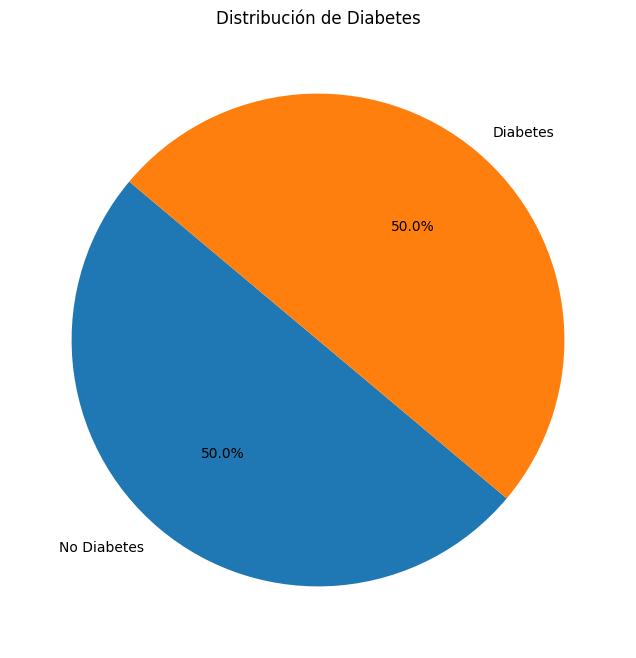

In [26]:
# Obtenemos la distribución de valores en 'Diabetes_012'
datos_diabetes = dataframe_diabetes_csv['Diabetes_binary'].value_counts()

# Creamos el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(datos_diabetes, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Diabetes')

plt.show()

Volvimos a registrar las variables que relacionaban el nivel educativo y los ingresos con el fin de determinar si, teniendo las variables equilibradas, podíamos detectar una relación negativa entre el incremento del nivel socioeconómico y la incidencia de diabetes. Pudimos ver que, en efecto, en los casos de mayores ingresos y educación existe un descenso en la incidencia de diabetes

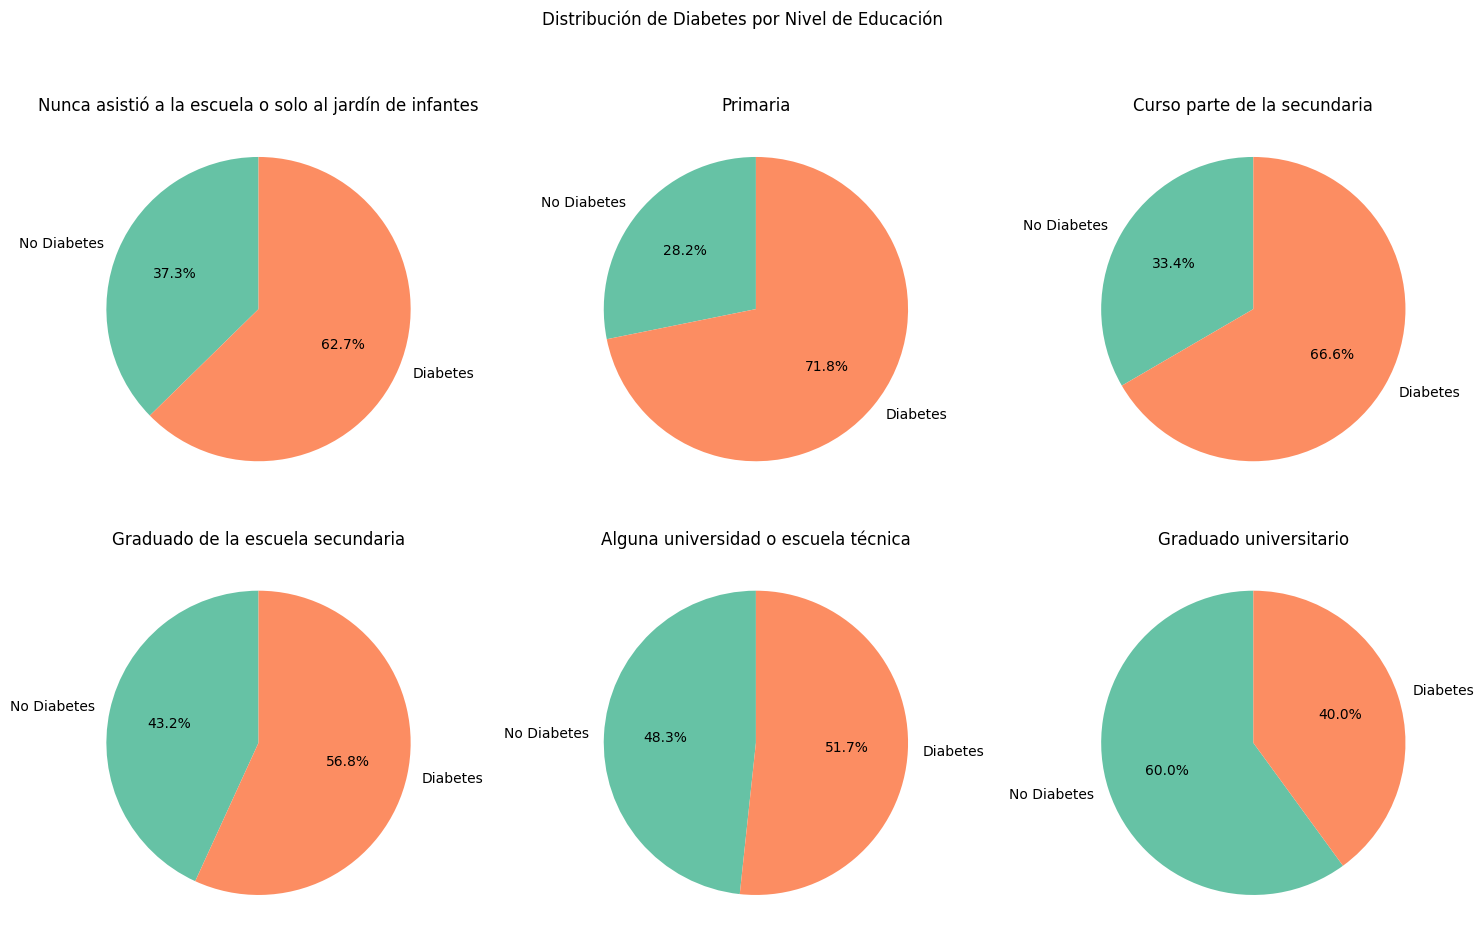

In [27]:
# Mapeamos el significado de la variable
education_map = {1: "Nunca asistió a la escuela o solo al jardín de infantes", 2: "Primaria", 3: "Curso parte de la secundaria", 4: "Graduado de la escuela secundaria", 5: "Alguna universidad o escuela técnica", 6: "Graduado universitario"}

# Filtrar personas con antecedentes de diabetes por nivel de educación
education_diabetes_distribution = dataframe_diabetes_csv.groupby(["Education", "Diabetes_binary"]).size().unstack()
education_diabetes_distribution = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

# Crear gráficos de torta para cada nivel de educación
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribución de Diabetes por Nivel de Educación")

for idx, education_level in enumerate(education_diabetes_distribution.index):
    row = idx // 3
    col = idx % 3
    data = education_diabetes_distribution.loc[education_level]
    labels = ["No Diabetes", "Diabetes"]
    colors = sns.color_palette("Set2")

    axes[row, col].pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[row, col].set_title(education_map[education_level])
    axes[row, col].set_aspect("equal")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

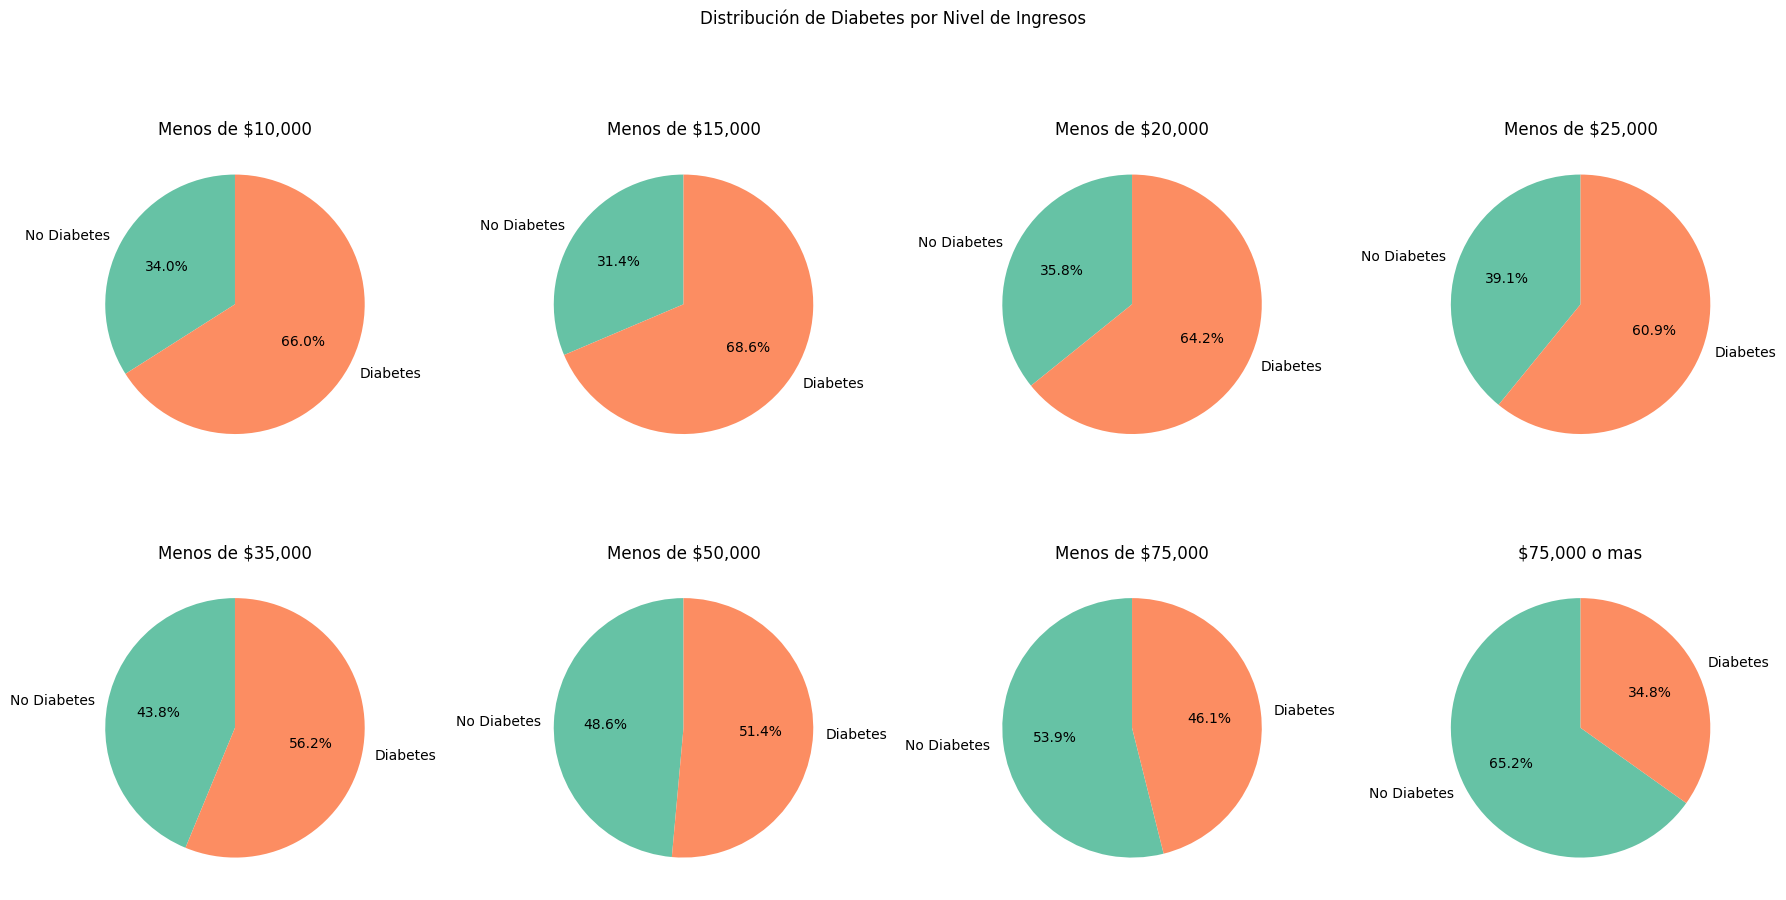

In [28]:
#Mapeamos el significado de la variable
income_map = {1: "Menos de $10,000", 2: "Menos de $15,000", 3: "Menos de $20,000", 4: "Menos de $25,000", 5: "Menos de $35,000", 6: "Menos de $50,000", 7: "Menos de $75,000", 8: "$75,000 o mas"}

# Filtrar personas con antecedentes de diabetes por nivel de ingresos
income_diabetes_distribution = dataframe_diabetes_csv.groupby(["Income", "Diabetes_binary"]).size().unstack()
income_diabetes_distribution = income_diabetes_distribution.div(income_diabetes_distribution.sum(axis=1), axis=0) * 100

# Crear gráficos de torta para cada nivel de ingresos
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle("Distribución de Diabetes por Nivel de Ingresos")

for idx, income_level in enumerate(income_diabetes_distribution.index):
    row = idx // 4
    col = idx % 4
    data = income_diabetes_distribution.loc[income_level]
    labels = ["No Diabetes", "Diabetes"]
    colors = sns.color_palette("Set2")

    axes[row, col].pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[row, col].set_title(income_map[income_level])
    axes[row, col].set_aspect("equal")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Realizamos ahora un boxplot para poder ver la relación entre el índice de masa corporal y la diabetes y pudimos comprobar que no es una causa determinante para la aparición de diabetes, pero que en efecto existe una correlación entre el aumento del BMI y la incidencia de la enfermedad.


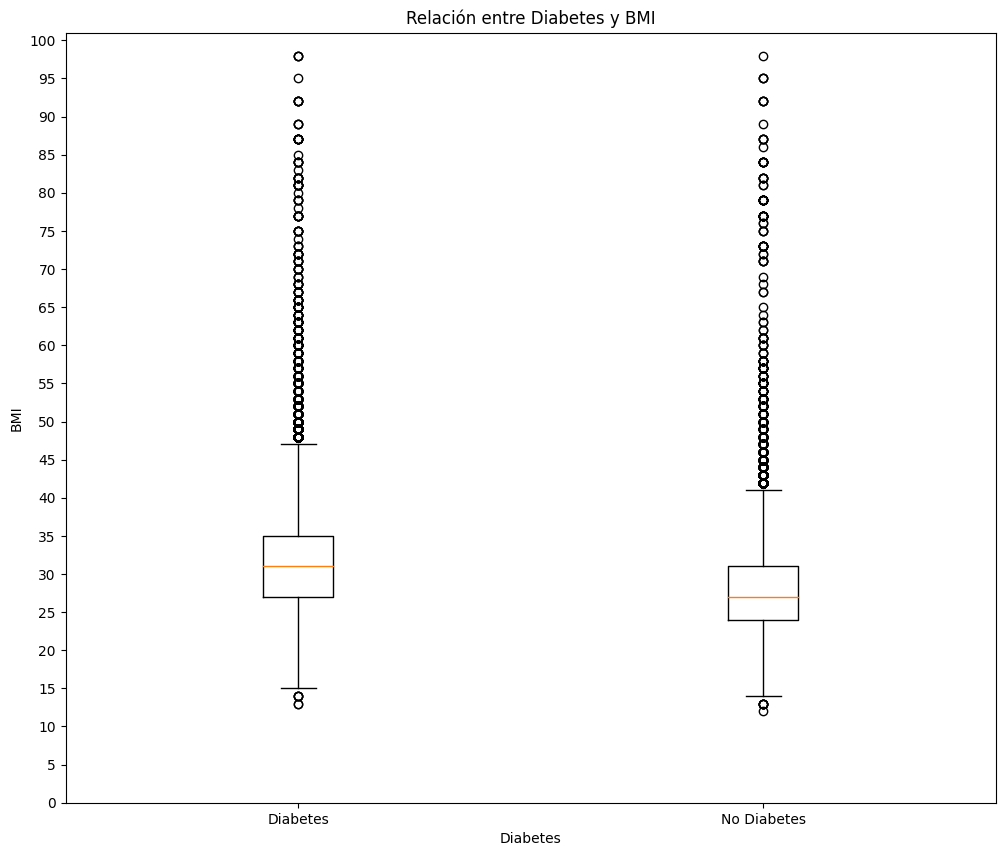

In [36]:
plt.figure(figsize=(12, 10))
plt.boxplot([dataframe_diabetes_csv[dataframe_diabetes_csv['Diabetes_binary'] == 1]['BMI'],
             dataframe_diabetes_csv[dataframe_diabetes_csv['Diabetes_binary'] == 0]['BMI']], labels=['Diabetes', 'No Diabetes'])
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('Relación entre Diabetes y BMI')
plt.yticks(range(0, 101, 5))
plt.ylim(0, 101)
plt.show()